## **Rossenblatt Neuron**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
class StepFunction(object):
    def __init__(self):
      pass
    def linear(self, sum):
      if sum >= 0:
        return 1
      return -1
class RosenblattNeuron(object):
  def __init__(self, shape, learning_rate =1, epoch=10):
      self.shape = shape
      self.learning_rate = learning_rate
      self.epochs = epoch
      self.weights = np.zeros(self.shape)
      self.bias = np.zeros(1)
  def train(self, inputs, targets, loss_func = object):
      total_error = 0
      self.loss_function = loss_func
      for epoch in range(self.epochs):
        for i in range(len(inputs)):
          input_pattern = inputs[i]
          target = targets[i]
          output = input_pattern.dot(self.weights)+self.bias
          prediction = loss_func.linear(output)
          total_error += target - prediction

          if target != prediction:
            self.weights += self.learning_rate * target * input_pattern
            self.bias += self.learning_rate * target
            print("Weight updated: " + str(self.weights[0]))
            print("Weight updated: " + str(self.weights[1]))
            print("Bias updated: " + str(self.bias))
            print("----------------------------------------")

        print("Total error: " + str(total_error))
        print("----------------------------------------")
  def predict(self, inputs, ret = False):
     self.out_raw =[]
     self.out_val =[]
     for input_pattern in inputs:
        sum = input_pattern.dot(self.weights)+self.bias
        self.out_raw.append(sum)
        output = self.loss_function.linear(sum)
        self.out_val.append(output)
        if not ret:
          print(f"Input: {input_pattern}, Output:{output > 0}")

  def TruthTable(self, input, input_labels, output_labels):
    table = pd.DataFrame(input, columns = input_labels)

    self.predict(input,True)
    # for row in input:
    #     signal = object.predict(message = row)
    #     out_signals.append(signal)
    table[output_labels] = pd.Series(self.out_val)
    return table







In [ ]:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
targets = np.array([-1, 1, 1, 1])

In [ ]:
step= StepFunction()

In [ ]:
rosen = RosenblattNeuron(inputs.shape[1], 0.1,100)

In [ ]:
rosen.predict(inputs)

Input: [-1 -1], Output:False
Input: [-1  1], Output:True
Input: [ 1 -1], Output:True
Input: [1 1], Output:True


In [ ]:
in_labels = ['x1', 'x2']
out_label = 'y'
rosen.TruthTable(inputs,in_labels,out_label)

,x1,x2,y
0,-1,-1,-1
1,-1,1,1
2,1,-1,1
3,1,1,1


## **Adeline Perceptron**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [ ]:

class StepFunction(object):
    def __init__(self):
      pass
    def linear(self, sum):
      return np.where(sum >= 0, 1, 0)

    def sigmoid(self, x):
      """Calculates the sigmoid function."""
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self,x):
      """Calculates the derivative of the sigmoid function."""
      return self.sigmoid(x) * (1 - self.sigmoid(x))

    def relu(self,x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def leaky_relu(self,x, alpha=0.01):
      return np.maximum(alpha * x, x)

    def leaky_relu_derivative(self, x, alpha=0.01):
      return np.where(x > 0, 1, alpha)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

    def elu(self,x, alpha=1.0):
      return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

    def elu_derivative(self,x, alpha=1.0):
      return np.where(x >= 0, 1, alpha * np.exp(x))

    def softmax(self,x):
      exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
      return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # Softmax derivative is complex and depends on the specific use case.
    # Generally, it's computed using backpropagation.

    def swish(self,x, beta=1):
      return x * self.sigmoid(beta * x)

    def swish_derivative(self,x, beta=1):
      return sigmoid(beta * x) + beta * x * self.sigmoid_derivative(beta * x)

    def PlotFunction(self, x,y=[],labels=[]):
        plt.figure(figsize=(10, 6))
        # Plot the sigmoid function
        colormap = plt.get_cmap('seismic_r')
        for [output,label] in zip(y,labels):
            # plt.plot(x, output, label=label, color=colormap(random.rand()+random.randint(40)))
            plt.plot(x, output, label=label, color=colormap(random.choice([3, 50, 70, 90])), linestyle= random.choice(["dashed"]))
            # random.choice([3, 5, 7, 9])

        # Plot the gradient
        # plt.plot(x, dydx, label="Gradient", color="red", linestyle="dashed")

        # Add labels and title
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Sigmoid Function and Gradient")

        # Add legend
        plt.legend()

        # Show the plot
        plt.grid(True)
        plt.show()


In [ ]:

class AdelineNeuron(object):
  def __init__(self, shape, learning_rate =0.1, epoch=10, random_state =1):
      self.shape = shape
      self.learning_rate = learning_rate
      self.epochs = epoch
      self.weights = np.zeros(self.shape)
      self.bias = np.zeros(1)
      self.random_state = random_state
      random.seed(self.random_state)

  def train(self, inputs, targets, act_func = object):
      self.act_function = act_func
      self.target = targets
      self.n_misclassifications_ = []
      self.total_errors = []
      for epoch in range(self.epochs):
        total_error = 0
        n_missclassifications = 0
        print("Epoch:" + str(epoch+1))
        for i in range(len(inputs)):
          input_pattern = inputs[i]
          target = targets[i]
          output = input_pattern.dot(self.weights)+self.bias
          prediction = self.act_function.linear(output)
          error = target - prediction
          total_error += error
          n_missclassifications += int(prediction != target)

          if target != prediction:
            self.weights += self.learning_rate * error * input_pattern
            self.bias += self.learning_rate * error

            print("Weight updated: " + str(self.weights[0]))
            print("Weight updated: " + str(self.weights[1]))
            print("Bias updated: " + str(self.bias))
            print("Total error: " + str(total_error))
            print("----------------------------------------")
        self.n_misclassifications_.append(n_missclassifications)
        self.total_errors.append(total_error)

        print("Total error: " + str(total_error))
        print("----------------------------------------")
        if n_missclassifications == 0:
            break
      return self

  def predict(self, inputs, ret = False):
     self.out_raw =[]
     self.out_val =[]
     for input_pattern in inputs:
        sum = input_pattern.dot(self.weights)+self.bias
        self.out_raw.append(sum)
        output = self.act_function.linear(sum)
        self.out_val.append(output[0])
        if not ret:
          print(f"Input: {input_pattern}, Prediction:{output > 0}")
     return np.array([self.out_val])

  def TruthTable(self, input, input_labels, output_labels, pred_labels="pre"):
    table = pd.DataFrame(input, columns = input_labels)

    self.predict(input,True)
    table[output_labels] = pd.Series(self.target)
    table[pred_labels] = pd.Series(self.out_val)
    return table

In [ ]:

gen = np.random.RandomState(1)
mean1, cov1 = [0, 0], [[1, 1], [1, 3]]
mean2, cov2 = [0, 10], [[1, 50], [1, 3]]
n_samples = 400
X, y = pd.DataFrame(np.vstack([np.random.multivariate_normal(mean1, cov1, size=int(n_samples/2)),
                               np.random.multivariate_normal(mean2, cov2, size=int(n_samples/2))]),
                    columns=['x1', 'x2']), pd.Series([0]*int(n_samples/2)+[1]*int(n_samples/2), name='target')

<ipython-input-12-9012a3dc25ef>:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  np.random.multivariate_normal(mean2, cov2, size=int(n_samples/2))]),


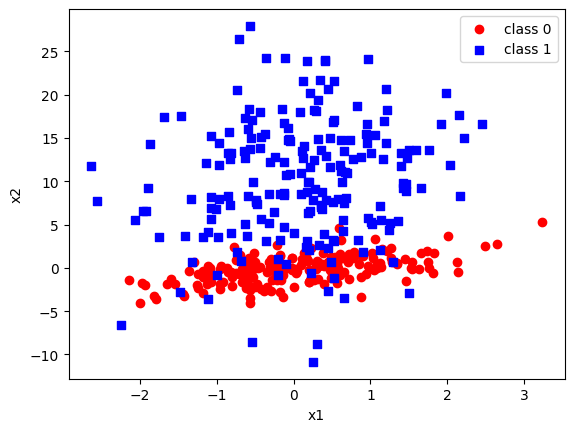

In [ ]:
fig = plt.figure()
ax = fig.subplots()
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='class 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='class 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

In [ ]:
inputs = np.array(X)
targets = np.array(y)

In [ ]:
step= StepFunction()

In [ ]:
adel = AdelineNeuron(inputs.shape[1], 1,100)

weights and bias [ 1.04064362 -0.18921873], [8.]


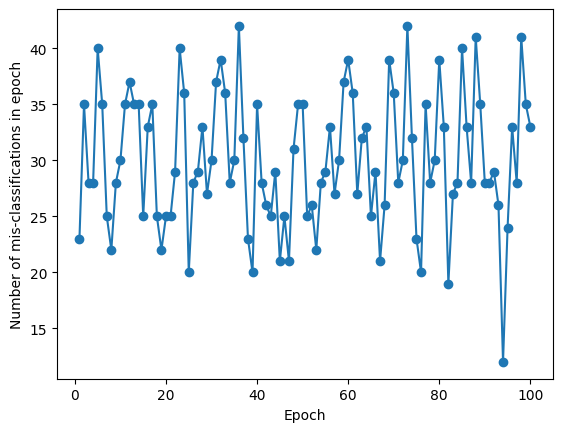

In [ ]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(range(1, len(learning_adel.n_misclassifications_)+1), learning_adel.n_misclassifications_, marker='o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Number of mis-classifications in epoch')
# fig.savefig('output/convergence.png', dpi=600)
print(f'weights and bias {learning_adel.weights}, {learning_adel.bias}')

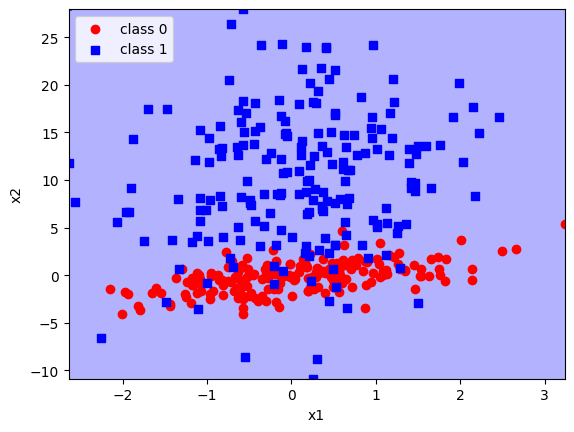

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

colors = ['red', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

x1, x2 = np.meshgrid(
np.linspace(X.iloc[:,0].min(), X.iloc[:,0].max(), num=200),
    np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), num=200)
)
grid = np.vstack([x1.ravel(), x2.ravel()]).T
learning_adel.predict(grid,True)
y_pred = np.reshape(learning_adel.out_val, x1.shape)

fig = plt.figure()
ax = fig.subplots()
display = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=y_pred)
display.plot(ax=ax, plot_method='contourf', cmap=cmap, alpha=0.3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='class 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='class 1')
ax.legend(loc='upper left')
# fig.savefig('output/decision_boundary.png', dpi=600)